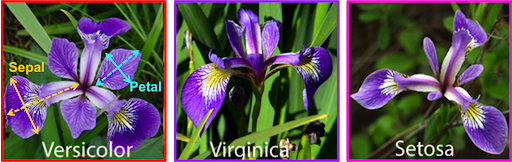

# Exploring the iris data set

First we have to import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# showing all columns
pd.set_option('display.max_columns', None)

Lets import the iris data set (is included within the scikit-learn module)

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()

Lets explore our data

In [5]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [6]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# feature names (variable names)
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# independed variable
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Lets make a pandas dataframe using the data, and target. Then we will assign its target names to it as column names

In [9]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Lets add the iris type from the irs_data['target']

In [11]:
iris_df['Iris type'] = iris_data['target']

In [12]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Also lets assign its iris type name

In [13]:
iris_df['Iris name'] = iris_df['Iris type'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

Our iris_df

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


The above lambda function might not be that readable, thus lets just make a function and use apply to add the new column.

In [15]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [16]:
iris_df['test'] = iris_df['Iris type'].apply(f)

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


Works fine, however lets get rid of the test column:

lets use some statistics

In [30]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris type          150 non-null    int32  
 5   Iris name          150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [31]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


If we groupby them by their type can refine better information

In [32]:
iris_df.groupby(['Iris name']).describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
Iris name                                                                  
sentosa                 50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
Iris name                                                                   
sentosa                50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
Iris name                                                                   
sentosa                 50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            \
                      count   mean       std  min  25%  50%  75%  max   
Iris name                                                               
sentosa                50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6   
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8   
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5   

           Iris type                                     
               count mean  std  min  25%  50%  75%  max  
Iris name                                                
sentosa         50.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
versicolor      50.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
virginica       50.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

We can observe that appears to be a distiction between the sizes of each type of iris. The mean values of sepal length of each flower type are 5, 5.9 and 6.5 (cm) resulting an easy distiction, while all the other measurements follow similar trends. 
Although some min values might be close, some max values show differences, for example the the width of a versicolor petal is 3 times the width of the sentosa one and 0.7 mm less then the virginica one.

However some graphs will helps us understand and spot better any differences.

## Data visualization

Lets make some graphs to help us understand our data

In [33]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Iris type', 'Iris name'],
      dtype='object')

In [34]:
# im just making a function in order not to repeat the same code
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='Iris name',y= y2, data=iris_df)

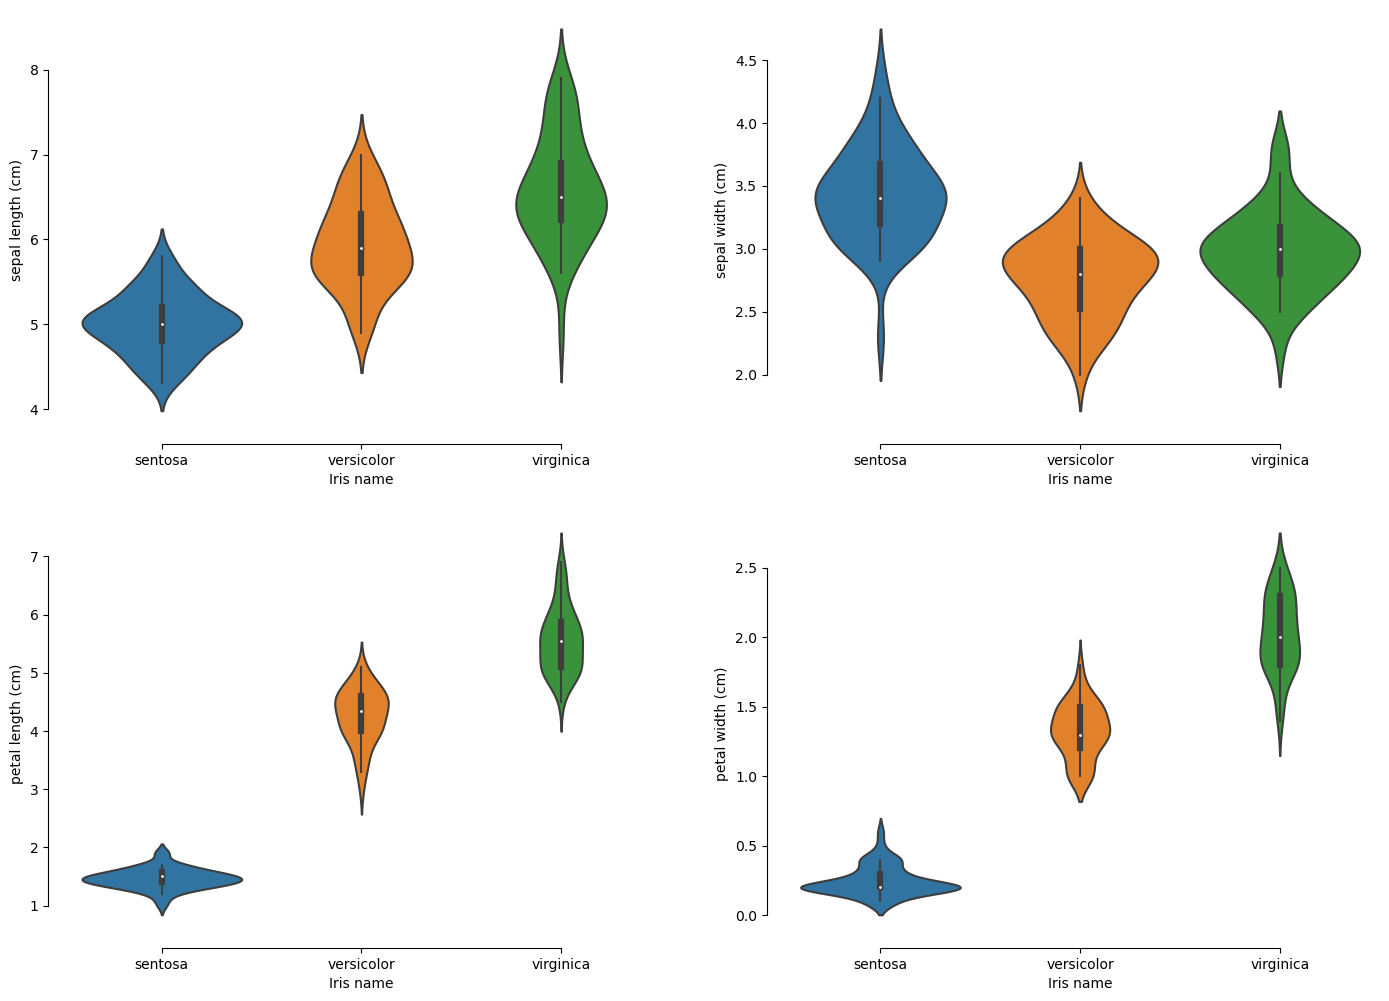

In [35]:
plt.figure(figsize=(17,12))
i = 1
for measurement in iris_df.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=True)
    i += 1
    

From the above violin plots we can notice hight density of the length and width of sentosa species, especialy for sepal length, petal length and petal width.
Also we can observe that the mean values and the interquartile range for the petal measurements are easily distinguish, althought the values of virginica species are more spreaded. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


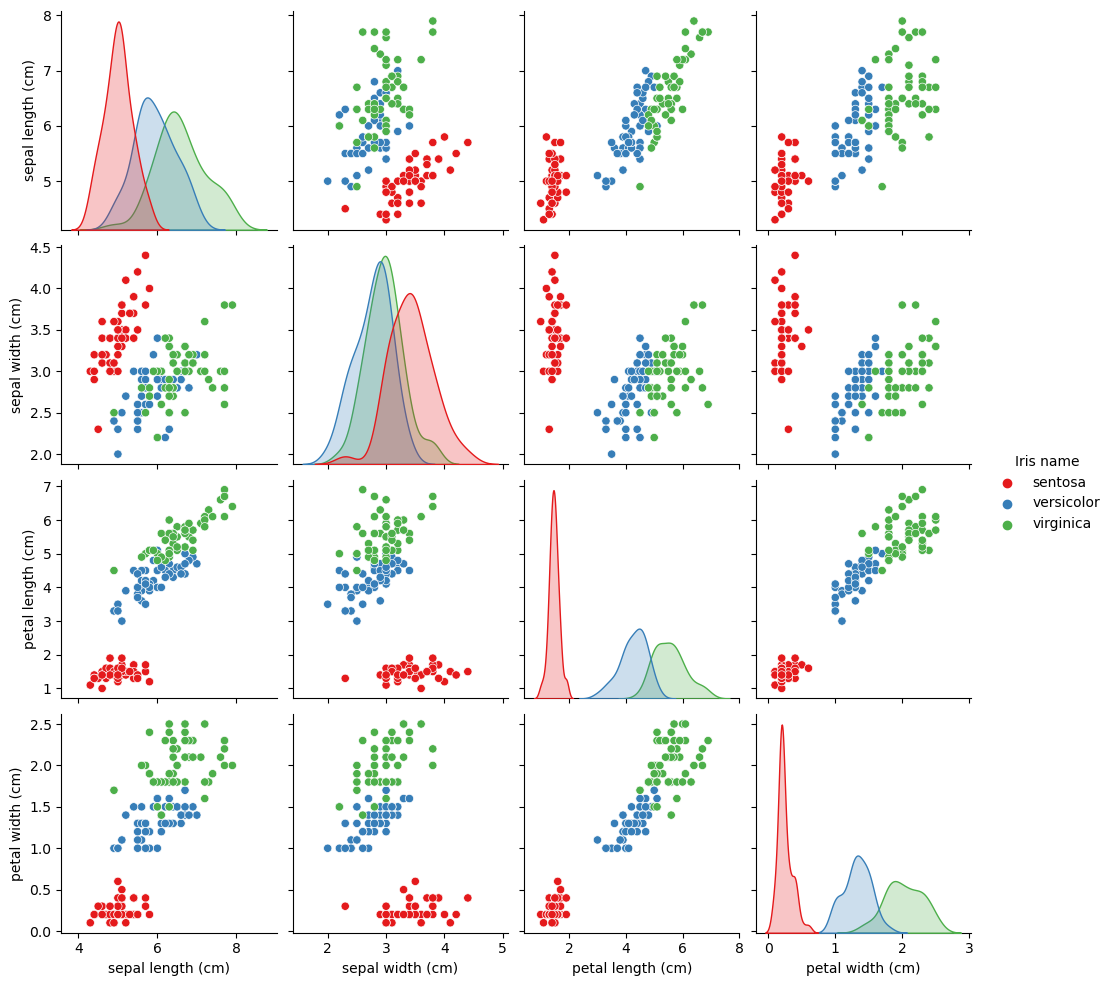

In [36]:
sns.pairplot(iris_df, hue = 'Iris name', vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette = 'Set1' );

From the above plots we can notice that the three different types can easily been spotted by their petal and sepal measurements. Thus a ML model could learn how to separate them.

Lets also produce a heatmap above to find out the correlations between the measurements

In [37]:
iris_df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


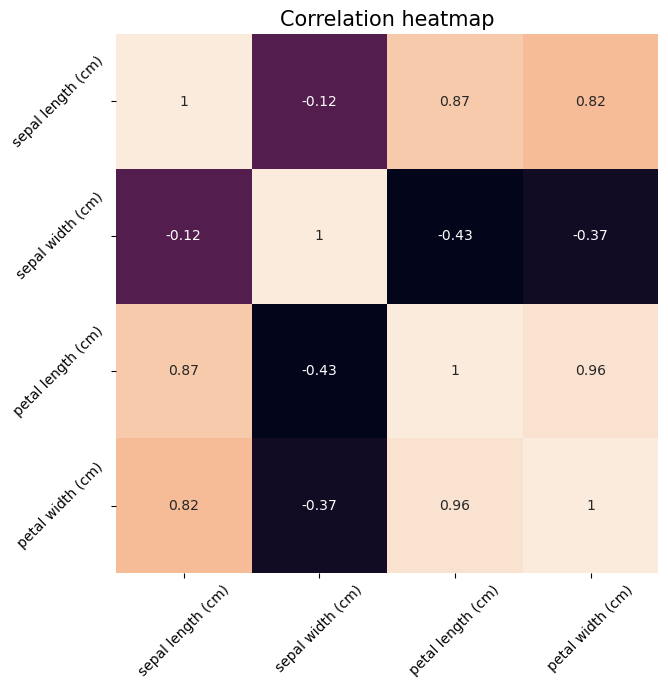

In [38]:
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(iris_df.iloc[:,:4].corr(), annot = True, cbar=False)
axes.tick_params(labelrotation=45)
plt.title('Correlation heatmap', fontsize = 15);

The **sepal width** and **width** are not correlated while the are highly correlated.
Using just the highly correlated measurements might increase our accurasy model.

## Training our ML model

We are going to use and test the k-Nearest Neighbors model, and since out data does not seem "noisy" we can choose a small value of k. We will set the k to 3.

Although we noticed that high correlaton between the **petal width** and **length** measurements, we will use all the mesurements available at the moment, 
and later check which gives the better accuracy.

Furthermore keep in mind that KNN is calculating the euclidean distance between the point we want to predict and the nearest(s) training data point(s) (neighbor). To this end 
scaling (normalizing) the data before applying the alogirthm usually is a good approach. However in our case all the data use the same unit of measurement (cm) so this is not necessary. 

Lets firstly call the train_test_split to split our data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = iris_df['Iris name']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluating the Model

In [44]:
y_pred = knn.predict(X_test)

In [45]:
y_pred

array(['virginica', 'versicolor', 'sentosa', 'virginica', 'sentosa',
       'virginica', 'sentosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'sentosa', 'versicolor', 'versicolor', 'sentosa',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'sentosa',
       'virginica', 'sentosa', 'sentosa', 'versicolor', 'versicolor',
       'sentosa', 'virginica', 'versicolor', 'sentosa', 'virginica',
       'virginica', 'versicolor', 'sentosa', 'virginica'], dtype=object)

Calculating the accuracy with knn.score()

In [46]:
print(f'Our model accuracy with k=3 is: {knn.score(X_test, y_test)}')

Our model accuracy with k=3 is: 0.9736842105263158


In [47]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
# also thanks https://www.youtube.com/watch?v=2osIZ-dSPGE&ab_channel=codebasics for his video, letting me know for this code
def print_confusion_matrix(confusion_matrix, class_names, figsize = (9,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Note that due to returning the created figure object, when this funciton is called in a
    notebook the figure willl be printed twice. To prevent this, either append ; to your
    function call, or modify the function by commenting out the return expression.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label', fontsize = 12)
    plt.title('Confusion Matrix', fontsize = 16)
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    # return fig

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

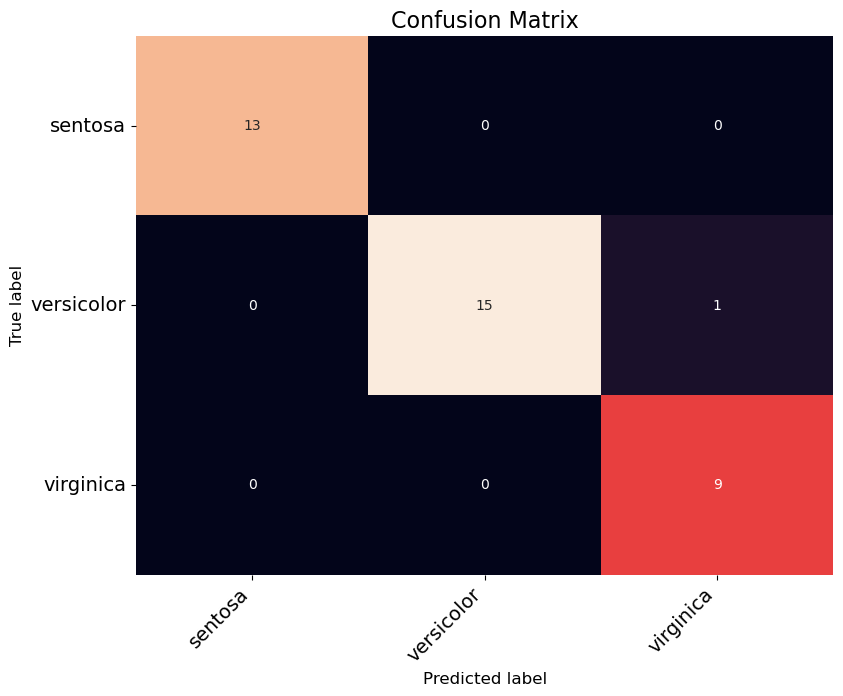

In [49]:
print_confusion_matrix(confusion_matrix(y_test, y_pred), ['sentosa', 'versicolor', 'virginica'])

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     sentosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



According to the classification report we can notice very good accuracy, precision and recall.

1.
Precision means how many predictions were correct out of the number of the predicted class. Precision = TP/(TP + FP)
For sentosa and versicolor the KNN achieved perfect precision, while for virginica 90%, meaning that out of all the predicted labels assigned as virginica the 90% were correct. More precisely the model predicted 10 flowers as virginica, while the 9 were correct predictions (TP), and 1 was wrong (FP). Precision_virginica 9/(9+1) = 0.9.

2.
Recall means how many predictions were correct out of the actual number of the specific class. Recall = TP/(TP + FN).
For versicolor the recalll score was 94%, meaning that the model predicted correct 15 versicolor flowers (TP), while 1 of them was assigned incorrectly as virginica (FN).  Recall_versicolor = 15/(15 + 1) = 0.94.

In this case, since we have not greate imbalance in our sample the accuracy scores serves as a good performance measure of the model.

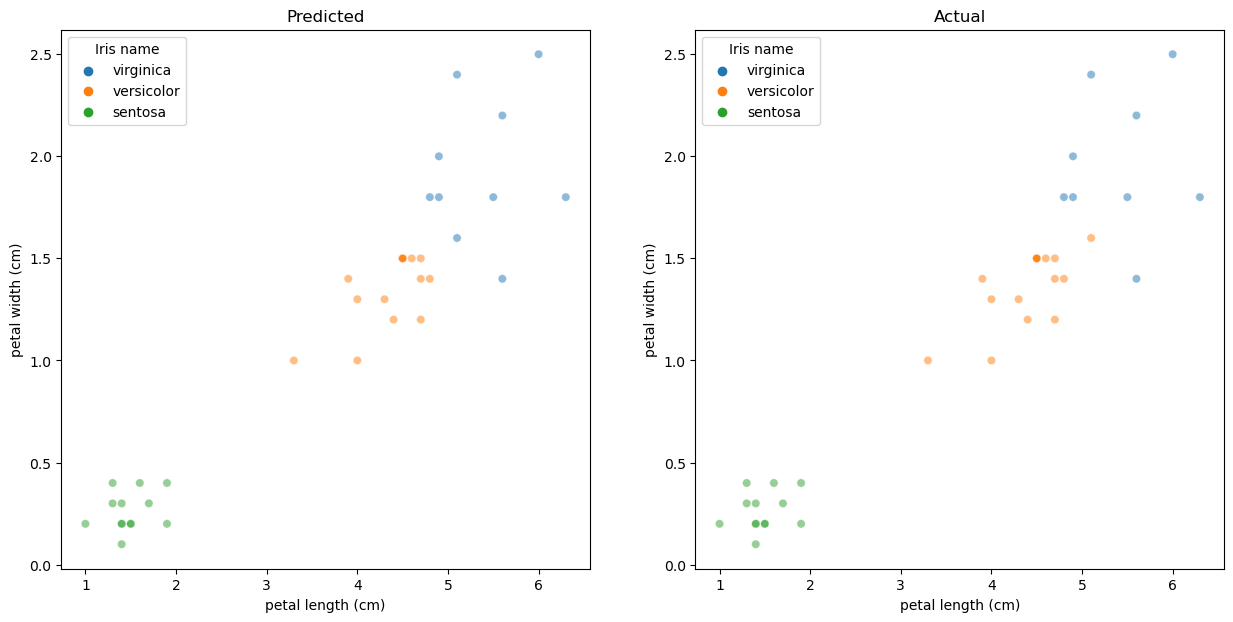

In [51]:

fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.scatterplot(x = X_test['petal length (cm)'], y = X_test['petal width (cm)'], hue = y_pred, alpha = 0.5)
plt.title('Predicted')
plt.legend(title='Iris name')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.scatterplot(x = X_test['petal length (cm)'], y = X_test['petal width (cm)'], hue = y_test, alpha = 0.5)
plt.title('Actual');

In [52]:
from joblib import dump

In [54]:
dump(knn,'./../savedModels/knn.joblib')

['./../savedModels/knn.joblib']